In [137]:
#for Standardization mean =0
#for Standardization standard deviation =1
#both properties holds for Data set

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [139]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\1_Bhiwadi\Book_1_PM.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,PM2.5
Date,
2021-01-01,228.53
2021-02-01,222.37
2021-03-01,128.14
2021-04-01,68.44
2021-05-01,62.51


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-01-01 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


<AxesSubplot:>

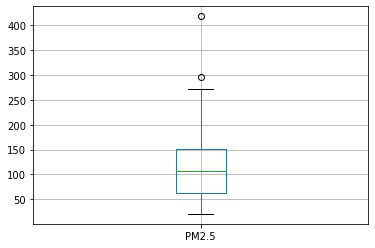

In [141]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [142]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [143]:
# the scaler object (model)
scaler = StandardScaler()

In [144]:
# fit and transform the data
scaled_data = scaler.fit_transform(df)

In [145]:
print(df)

             PM2.5
Date              
2021-01-01  228.53
2021-02-01  222.37
2021-03-01  128.14
2021-04-01   68.44
2021-05-01   62.51
...            ...
2021-12-27   92.11
2021-12-28  124.25
2021-12-29  105.15
2021-12-30  161.22
2021-12-31  156.41

[365 rows x 1 columns]


In [146]:
print(scaled_data.shape)
#print('X' ,X.shape)

(365, 1)


In [147]:
print(scaled_data)

[[ 2.01127500e+00]
 [ 1.90598451e+00]
 [ 2.95347690e-01]
 [-7.25081241e-01]
 [-8.26440429e-01]
 [ 2.07320738e-01]
 [ 1.41685109e-01]
 [ 1.82023673e-01]
 [ 7.84367316e-01]
 [ 1.45103631e-01]
 [-3.54513415e-01]
 [ 2.83553788e-01]
 [ 1.35782445e+00]
 [ 1.66685887e+00]
 [ 1.73283635e+00]
 [ 1.27612176e+00]
 [ 7.26081510e-01]
 [ 9.42132124e-01]
 [ 1.28740288e+00]
 [-3.63059721e-01]
 [ 2.31592247e-01]
 [ 7.97699554e-01]
 [-8.03479198e-02]
 [ 1.21629762e+00]
 [ 9.24697660e-01]
 [ 3.87476868e-01]
 [ 4.83537347e-01]
 [ 1.37081483e+00]
 [ 6.39080115e-01]
 [ 2.83211935e-01]
 [ 2.31421321e-01]
 [ 9.87256619e-01]
 [ 1.25116655e+00]
 [-1.00688128e-01]
 [-3.91433456e-01]
 [ 1.45616410e-01]
 [-2.15493348e-02]
 [-1.49402072e-01]
 [ 3.42181446e-01]
 [ 2.74323777e-01]
 [ 6.04952023e-02]
 [ 1.02195462e+00]
 [ 9.10510792e-01]
 [ 1.46841364e+00]
 [ 8.92050771e-01]
 [ 7.33944111e-01]
 [ 4.23713205e-01]
 [ 1.08519729e+00]
 [ 1.67096110e+00]
 [ 1.07425801e+00]
 [ 1.96438598e-02]
 [ 2.40879389e-02]
 [-1.9076619

In [148]:
#for Standardization mean =0
scaled_data.mean(axis = 0)
#df([0., 0.])

array([1.16801546e-16])

In [149]:
#for Standardization standard deviation =1
scaled_data.std(axis = 0)
#array([1., 1.])

array([1.])

In [150]:
#Creating a window for previous data
def to_supervised(train):
    window_size = 4
    X = []
    Y = []
    for i in range(window_size, len(train)):
        X.append(train[i-window_size:i,:])
        Y.append(train[i,0:1])
    
    return X,Y

In [151]:
X, Y = to_supervised(scaled_data)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (361, 1)
X (361, 4, 1)


In [152]:
X

array([[[ 2.011275  ],
        [ 1.90598451],
        [ 0.29534769],
        [-0.72508124]],

       [[ 1.90598451],
        [ 0.29534769],
        [-0.72508124],
        [-0.82644043]],

       [[ 0.29534769],
        [-0.72508124],
        [-0.82644043],
        [ 0.20732074]],

       ...,

       [[ 1.37953206],
        [ 1.44345843],
        [-0.32049912],
        [ 0.22885743]],

       [[ 1.44345843],
        [-0.32049912],
        [ 0.22885743],
        [-0.09761146]],

       [[-0.32049912],
        [ 0.22885743],
        [-0.09761146],
        [ 0.86077129]]])

In [153]:
#Splitting the dataset 365*0.2=73
#Splitting the dataset 365*0.3=110
n_train = 64
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (297, 4, 1)
X_test (64, 4, 1)
Y_train (297, 1)
Y_test (64, 1)


In [154]:
#Importing LSTM model
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
import tensorflow as tf
model = Sequential()

#units means number of neurons
model.add(LSTM(units = 100, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

 
#opt1 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False, name="SGD")

opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt)

In [155]:
def call(c):
    history = model.fit(X_train, Y_train, epochs=c,
                    batch_size=8, validation_data=(X_test, Y_test),
                    verbose=2, shuffle=False)
    def model_loss(history):
        plt.figure(figsize=(8,4))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Test Loss')
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epochs')
        plt.legend(loc='upper right')
        plt.show();
        
    #Taking predictions
    Y_pred = model.predict(X_test)
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(Y_test, Y_pred)
    print('MSE')
    print(mse)
    rmse = np.sqrt(mse)
    print('RMSE')
    print(rmse)
    mae = np.mean(np.abs(Y_test, Y_pred))    # MAE
    print('MAE')
    print(mae)

    # plot history
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='Val_loss')
    plt.legend()
    plt.show()

Epoch 1/10
38/38 - 4s - loss: 2.6671 - val_loss: 3.7485 - 4s/epoch - 109ms/step
Epoch 2/10
38/38 - 0s - loss: 2.0638 - val_loss: 3.5207 - 220ms/epoch - 6ms/step
Epoch 3/10
38/38 - 0s - loss: 2.3147 - val_loss: 3.0765 - 217ms/epoch - 6ms/step
Epoch 4/10
38/38 - 0s - loss: 2.3248 - val_loss: 2.5576 - 217ms/epoch - 6ms/step
Epoch 5/10
38/38 - 0s - loss: 2.3488 - val_loss: 2.6932 - 217ms/epoch - 6ms/step
Epoch 6/10
38/38 - 0s - loss: 2.3233 - val_loss: 2.1519 - 200ms/epoch - 5ms/step
Epoch 7/10
38/38 - 0s - loss: 2.1984 - val_loss: 0.9051 - 202ms/epoch - 5ms/step
Epoch 8/10
38/38 - 0s - loss: 2.2382 - val_loss: 0.8876 - 215ms/epoch - 6ms/step
Epoch 9/10
38/38 - 0s - loss: 2.0395 - val_loss: 1.0930 - 218ms/epoch - 6ms/step
Epoch 10/10
38/38 - 0s - loss: 2.1440 - val_loss: 0.9009 - 217ms/epoch - 6ms/step
2/2 [==============================] - 1s 18ms/step
MSE
0.9008869002087031
RMSE
0.9491506204015794
MAE
0.5747457


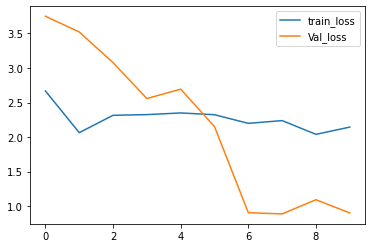

Epoch 1/20
38/38 - 0s - loss: 2.0290 - val_loss: 1.1569 - 214ms/epoch - 6ms/step
Epoch 2/20
38/38 - 0s - loss: 1.8609 - val_loss: 0.9227 - 203ms/epoch - 5ms/step
Epoch 3/20
38/38 - 0s - loss: 1.9709 - val_loss: 1.0866 - 199ms/epoch - 5ms/step
Epoch 4/20
38/38 - 0s - loss: 2.2042 - val_loss: 1.5959 - 200ms/epoch - 5ms/step
Epoch 5/20
38/38 - 0s - loss: 2.3187 - val_loss: 1.7741 - 202ms/epoch - 5ms/step
Epoch 6/20
38/38 - 0s - loss: 2.2580 - val_loss: 1.4093 - 215ms/epoch - 6ms/step
Epoch 7/20
38/38 - 0s - loss: 2.0825 - val_loss: 0.7981 - 201ms/epoch - 5ms/step
Epoch 8/20
38/38 - 0s - loss: 1.9724 - val_loss: 0.7388 - 217ms/epoch - 6ms/step
Epoch 9/20
38/38 - 0s - loss: 1.9282 - val_loss: 1.0039 - 202ms/epoch - 5ms/step
Epoch 10/20
38/38 - 0s - loss: 1.9409 - val_loss: 0.7956 - 214ms/epoch - 6ms/step
Epoch 11/20
38/38 - 0s - loss: 1.9203 - val_loss: 0.6761 - 200ms/epoch - 5ms/step
Epoch 12/20
38/38 - 0s - loss: 1.9038 - val_loss: 0.7610 - 201ms/epoch - 5ms/step
Epoch 13/20
38/38 - 0s - 

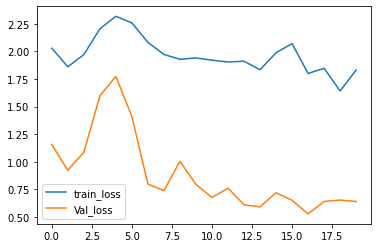

Epoch 1/30
38/38 - 0s - loss: 1.8209 - val_loss: 0.4442 - 200ms/epoch - 5ms/step
Epoch 2/30
38/38 - 0s - loss: 1.8981 - val_loss: 0.6961 - 201ms/epoch - 5ms/step
Epoch 3/30
38/38 - 0s - loss: 1.8403 - val_loss: 0.6242 - 200ms/epoch - 5ms/step
Epoch 4/30
38/38 - 0s - loss: 1.7226 - val_loss: 0.5680 - 200ms/epoch - 5ms/step
Epoch 5/30
38/38 - 0s - loss: 1.9405 - val_loss: 0.5879 - 203ms/epoch - 5ms/step
Epoch 6/30
38/38 - 0s - loss: 1.8487 - val_loss: 0.5455 - 198ms/epoch - 5ms/step
Epoch 7/30
38/38 - 0s - loss: 2.0685 - val_loss: 0.6743 - 199ms/epoch - 5ms/step
Epoch 8/30
38/38 - 0s - loss: 1.9542 - val_loss: 0.7579 - 201ms/epoch - 5ms/step
Epoch 9/30
38/38 - 0s - loss: 1.8551 - val_loss: 0.7751 - 199ms/epoch - 5ms/step
Epoch 10/30
38/38 - 0s - loss: 1.9188 - val_loss: 0.6610 - 200ms/epoch - 5ms/step
Epoch 11/30
38/38 - 0s - loss: 1.8408 - val_loss: 0.5513 - 200ms/epoch - 5ms/step
Epoch 12/30
38/38 - 0s - loss: 1.7453 - val_loss: 0.8934 - 200ms/epoch - 5ms/step
Epoch 13/30
38/38 - 0s - 

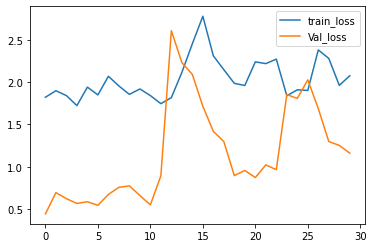

Epoch 1/40
38/38 - 0s - loss: 2.0126 - val_loss: 0.9323 - 248ms/epoch - 7ms/step
Epoch 2/40
38/38 - 0s - loss: 1.7894 - val_loss: 0.7951 - 193ms/epoch - 5ms/step
Epoch 3/40
38/38 - 0s - loss: 2.0045 - val_loss: 1.2070 - 202ms/epoch - 5ms/step
Epoch 4/40
38/38 - 0s - loss: 1.9082 - val_loss: 0.8642 - 215ms/epoch - 6ms/step
Epoch 5/40
38/38 - 0s - loss: 2.1141 - val_loss: 1.5651 - 201ms/epoch - 5ms/step
Epoch 6/40
38/38 - 0s - loss: 2.3268 - val_loss: 1.0283 - 200ms/epoch - 5ms/step
Epoch 7/40
38/38 - 0s - loss: 2.2678 - val_loss: 0.7540 - 199ms/epoch - 5ms/step
Epoch 8/40
38/38 - 0s - loss: 1.8994 - val_loss: 0.9639 - 215ms/epoch - 6ms/step
Epoch 9/40
38/38 - 0s - loss: 2.0781 - val_loss: 1.1188 - 219ms/epoch - 6ms/step
Epoch 10/40
38/38 - 0s - loss: 2.0223 - val_loss: 0.6671 - 201ms/epoch - 5ms/step
Epoch 11/40
38/38 - 0s - loss: 1.8759 - val_loss: 0.6889 - 231ms/epoch - 6ms/step
Epoch 12/40
38/38 - 0s - loss: 1.8369 - val_loss: 0.8338 - 219ms/epoch - 6ms/step
Epoch 13/40
38/38 - 0s - 

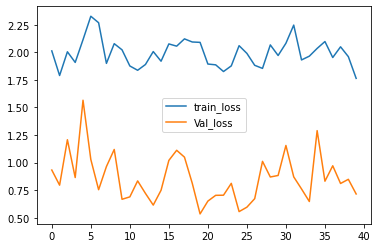

Epoch 1/50
38/38 - 0s - loss: 1.9993 - val_loss: 1.1158 - 203ms/epoch - 5ms/step
Epoch 2/50
38/38 - 0s - loss: 1.9939 - val_loss: 0.7162 - 203ms/epoch - 5ms/step
Epoch 3/50
38/38 - 0s - loss: 1.8849 - val_loss: 0.8424 - 200ms/epoch - 5ms/step
Epoch 4/50
38/38 - 0s - loss: 1.8211 - val_loss: 0.6029 - 200ms/epoch - 5ms/step
Epoch 5/50
38/38 - 0s - loss: 2.0046 - val_loss: 0.5169 - 243ms/epoch - 6ms/step
Epoch 6/50
38/38 - 0s - loss: 1.9128 - val_loss: 0.5049 - 242ms/epoch - 6ms/step
Epoch 7/50
38/38 - 0s - loss: 2.0020 - val_loss: 0.7132 - 198ms/epoch - 5ms/step
Epoch 8/50
38/38 - 0s - loss: 2.0570 - val_loss: 0.5692 - 199ms/epoch - 5ms/step
Epoch 9/50
38/38 - 0s - loss: 1.9096 - val_loss: 0.4026 - 200ms/epoch - 5ms/step
Epoch 10/50
38/38 - 0s - loss: 1.6658 - val_loss: 0.5742 - 200ms/epoch - 5ms/step
Epoch 11/50
38/38 - 0s - loss: 1.8975 - val_loss: 0.8085 - 199ms/epoch - 5ms/step
Epoch 12/50
38/38 - 0s - loss: 1.9987 - val_loss: 0.4755 - 199ms/epoch - 5ms/step
Epoch 13/50
38/38 - 0s - 

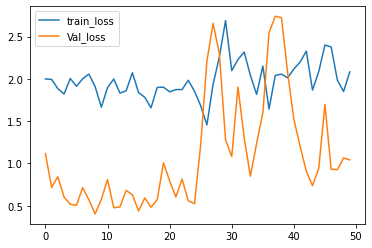

In [156]:
l=[10,20,30,40,50]
for i in l:
    call(i)

In [157]:
#Taking predictions
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

print(mse)
rmse = np.sqrt(mse)
print(rmse)

2/2 [==============================] - 0s 4ms/step
1.0419167130794207
1.020743216033994


In [158]:
Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_data.shape)

y_predicted (64, 1)
X_train (297, 4, 1)
X_test (64, 4, 1)
scaled Values shape (365, 1)


In [159]:
#Scaling back to the original scale
d = scaled_data[:300,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:64,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:64,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (300, 1)
Y_pred (64, 1)
concat y_pred (64, 1)
concat Y_test (64, 1)


In [160]:
#Take inverse transform
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (64, 1)
Y_predicted (64, 1)


In [161]:
#Calculate error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

3566.2857721441114
59.718387219884896


In [162]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_tested, Y_predicted)
r2

-1.8992125670559177

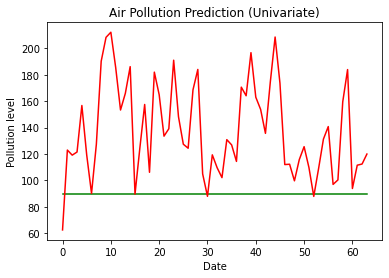

In [163]:
#Plot the graph between actual vs predicted values => 100 days
plt.plot(Y_predicted[:100,:], color= 'green')
plt.plot(Y_tested[:100,:] , color = 'red')
plt.title("Air Pollution Prediction (Univariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.show()

In [164]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)

MAPE 32.029492053007594


In [165]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_tested, Y_predicted)
r2

-1.8992125670559177

In [166]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))
print("Mean of pred data ", np.mean(Y_predicted))

RMSE 59.718387219884896
Mean of Test data  137.85453124999998
Mean of pred data  89.52029852519647


array([<AxesSubplot:xlabel='Date'>], dtype=object)

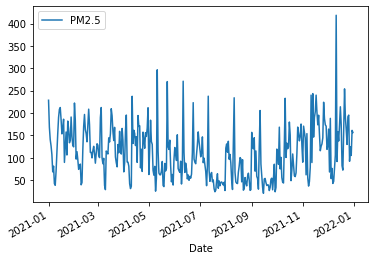

In [167]:
# A simple plot to visualize the correlation between the columns
df.plot(subplots=True)
#df.plot(subplots=True,figsize=(15,13));

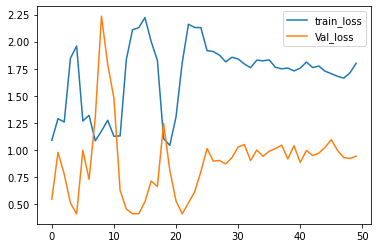

In [168]:
# plot history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.legend()
plt.show()